<a href="https://colab.research.google.com/github/kishan4935/Fake_News_Detection/blob/main/Fake_News_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import sklearn
import itertools
import numpy as np
import seaborn as sb
import re
import nltk
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from sklearn.linear_model import PassiveAggressiveClassifier
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [7]:
train_df = pd.read_csv(r'/content/drive/MyDrive/train.csv')

In [8]:
train_df.head(15)

,Statement,Label
0,Says the Annies List political group supports ...,0
1,When did the decline of coal start? It started...,1
2,"Hillary Clinton agrees with John McCain ""by vo...",1
3,Health care reform legislation is likely to ma...,0
4,The economic turnaround started at the end of ...,1
5,The Chicago Bears have had more starting quart...,1
6,Jim Dunnam has not lived in the district he re...,0
7,I'm the only person on this stage who has work...,1
8,"However, it took $19.5 million in Oregon Lotte...",1
9,Says GOP primary opponents Glenn Grothman and ...,1


In [9]:
train_df.shape

(10240, 2)

In [10]:
train_df.head(15)

,Statement,Label
0,Says the Annies List political group supports ...,0
1,When did the decline of coal start? It started...,1
2,"Hillary Clinton agrees with John McCain ""by vo...",1
3,Health care reform legislation is likely to ma...,0
4,The economic turnaround started at the end of ...,1
5,The Chicago Bears have had more starting quart...,1
6,Jim Dunnam has not lived in the district he re...,0
7,I'm the only person on this stage who has work...,1
8,"However, it took $19.5 million in Oregon Lotte...",1
9,Says GOP primary opponents Glenn Grothman and ...,1


<Axes: xlabel='Label', ylabel='count'>

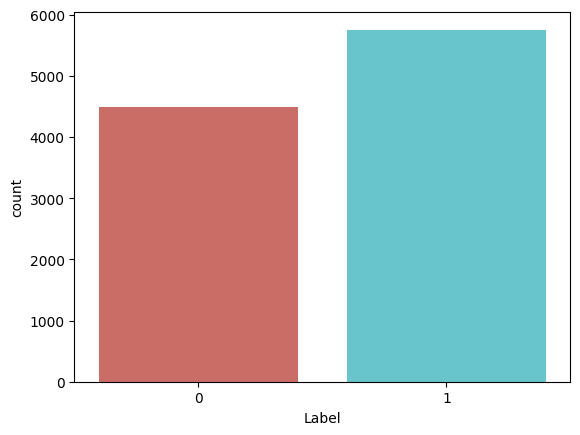

In [12]:
def create_distribution(dataFile):
    return sb.countplot(x='Label', data=dataFile, palette='hls')

# by calling below we can see that training, test and valid data seems to be failry evenly distributed between the classes
create_distribution(train_df)

In [13]:
def data_qualityCheck():
    print("Checking data qualitites...")
    train_df.isnull().sum()
    train_df.info()
    print("check finished.")
data_qualityCheck()

Checking data qualitites...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Statement  10240 non-null  object
 1   Label      10240 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 160.1+ KB
check finished.


In [14]:
train_df = train_df.dropna()

In [15]:
data_qualityCheck()

Checking data qualitites...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Statement  10240 non-null  object
 1   Label      10240 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 160.1+ KB
check finished.


In [16]:
train_df.shape

(10240, 2)

In [17]:
train_df.head(10)

,Statement,Label
0,Says the Annies List political group supports ...,0
1,When did the decline of coal start? It started...,1
2,"Hillary Clinton agrees with John McCain ""by vo...",1
3,Health care reform legislation is likely to ma...,0
4,The economic turnaround started at the end of ...,1
5,The Chicago Bears have had more starting quart...,1
6,Jim Dunnam has not lived in the district he re...,0
7,I'm the only person on this stage who has work...,1
8,"However, it took $19.5 million in Oregon Lotte...",1
9,Says GOP primary opponents Glenn Grothman and ...,1


In [18]:
train_df.reset_index(drop= True,inplace=True)

In [19]:
train_df.head(10)

,Statement,Label
0,Says the Annies List political group supports ...,0
1,When did the decline of coal start? It started...,1
2,"Hillary Clinton agrees with John McCain ""by vo...",1
3,Health care reform legislation is likely to ma...,0
4,The economic turnaround started at the end of ...,1
5,The Chicago Bears have had more starting quart...,1
6,Jim Dunnam has not lived in the district he re...,0
7,I'm the only person on this stage who has work...,1
8,"However, it took $19.5 million in Oregon Lotte...",1
9,Says GOP primary opponents Glenn Grothman and ...,1


In [21]:
label_train = train_df.Label

In [22]:
label_train.head(10)

0    0
1    1
2    1
3    0
4    1
5    1
6    0
7    1
8    1
9    1
Name: Label, dtype: int64

In [24]:
train_df = train_df.drop("Label", axis = 1)

In [25]:
train_df.head(10)

,Statement
0,Says the Annies List political group supports ...
1,When did the decline of coal start? It started...
2,"Hillary Clinton agrees with John McCain ""by vo..."
3,Health care reform legislation is likely to ma...
4,The economic turnaround started at the end of ...
5,The Chicago Bears have had more starting quart...
6,Jim Dunnam has not lived in the district he re...
7,I'm the only person on this stage who has work...
8,"However, it took $19.5 million in Oregon Lotte..."
9,Says GOP primary opponents Glenn Grothman and ...


In [29]:
train_df['Statement'][2188]

'Says 94 percent of Wisconsin employers think the state is heading in the right direction and a majority say they will grow their companies in 2012.'

In [32]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [33]:
lemmatizer = WordNetLemmatizer()
stpwrds = list(stopwords.words('english'))

In [34]:
stpwrds

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [39]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [41]:
for x in range(len(train_df)) :
    corpus = []
    review = train_df['Statement'][x]
    review = re.sub(r'[^a-zA-Z\s]', '', review)
    review = review.lower()
    review = nltk.word_tokenize(review)
    for y in review :
        if y not in stpwrds :
            corpus.append(lemmatizer.lemmatize(y))
    review = ' '.join(corpus)
    train_df['Statement'][x] = review

In [42]:
train_df['Statement'][2182]

'new york city murder'

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(train_df['Statement'], label_train, test_size=0.3, random_state=1)

In [46]:
X_train

3474    saysbarack obama voted language ofindianas rel...
6202                  say apple tim cook business indiana
5868    majority candidate stage supported amnesty nev...
7357          k home owner suicide attributed foreclosure
9514    thurbert baker kept teen jail didnt even commi...
                              ...                        
2895             u rep allen west want bring back earmark
7813                           oil drilling florida coast
905     last year weve put people back work advanced e...
5192       latin america economy almost big economy china
235                       say marco rubio one open border
Name: Statement, Length: 7168, dtype: object

In [47]:
X_train.shape

(7168,)

In [48]:
Y_train

3474    1
6202    0
5868    1
7357    0
9514    0
       ..
2895    0
7813    1
905     1
5192    1
235     0
Name: Label, Length: 7168, dtype: int64

In [49]:
tfidf_v = TfidfVectorizer()
tfidf_X_train = tfidf_v.fit_transform(X_train)
tfidf_X_test = tfidf_v.transform(X_test)

In [50]:
tfidf_X_train.shape

(7168, 9109)

In [51]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [52]:
classifier = PassiveAggressiveClassifier()
classifier.fit(tfidf_X_train,Y_train)

PassiveAggressiveClassifier()

Accuracy: 55.5%
Confusion matrix, without normalization


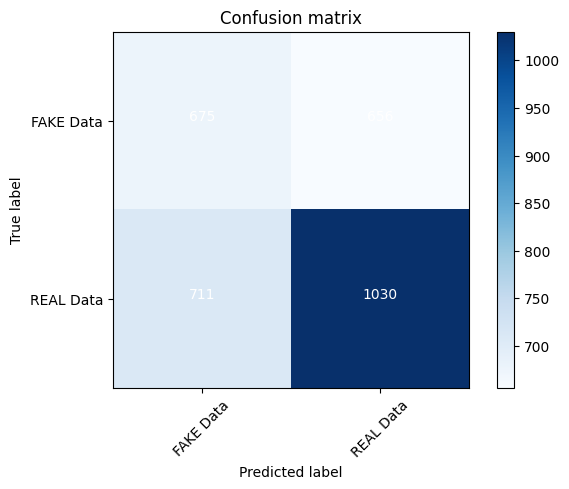

In [53]:
Y_pred = classifier.predict(tfidf_X_test)
score = metrics.accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {round(score*100,2)}%')
cm = metrics.confusion_matrix(Y_test, Y_pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

In [54]:
pickle.dump(classifier,open('./model.pkl', 'wb'))

In [55]:
# load the model from disk
loaded_model = pickle.load(open('./model.pkl', 'rb'))

In [56]:
def fake_news_det(news):
    review = news
    review = re.sub(r'[^a-zA-Z\s]', '', review)
    review = review.lower()
    review = nltk.word_tokenize(review)
    for y in review :
        if y not in stpwrds :
            corpus.append(lemmatizer.lemmatize(y))
    input_data = [' '.join(corpus)]
    vectorized_input_data = tfidf_v.transform(input_data)
    prediction = loaded_model.predict(vectorized_input_data)
    if prediction[0] == 0:
        print("Prediction of the News :  Looking Fake⚠ News📰 ")
    else:
        print("Prediction of the News : Looking Real News📰 ")

In [58]:
fake_news_det("The Manipur government has warned that no person will be immune to prosecution under the laws of the country if he/she is found to be generating or spreading fake news, lies, rumours or misinformation, the state’s chief secretary said")

Prediction of the News :  Looking Fake⚠ News📰 


In [60]:
fake_news_det("POSTED INPOLITICS AND MOVEMENTS: US Grindr issues mandatory return to office policy 2 weeks after union drive")

Prediction of the News :  Looking Fake⚠ News📰 
